<h3>Boundary detection</h3>

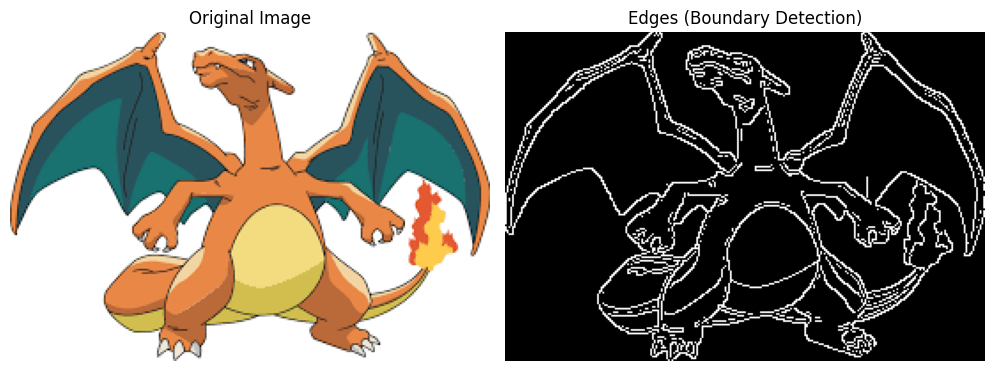

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/pokemon-img/charizad.png"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image. Check the path!")
else:
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Boundary detection using Canny Edge Detection
    edges = cv2.Canny(gray, 100, 200)


    # Plot the results using matplotlib
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Edges (Boundary Detection)")
    plt.imshow(edges, cmap="gray")
    plt.axis("off")

    

    plt.tight_layout()
    plt.show()


<h3>Background Subtraction</h3>

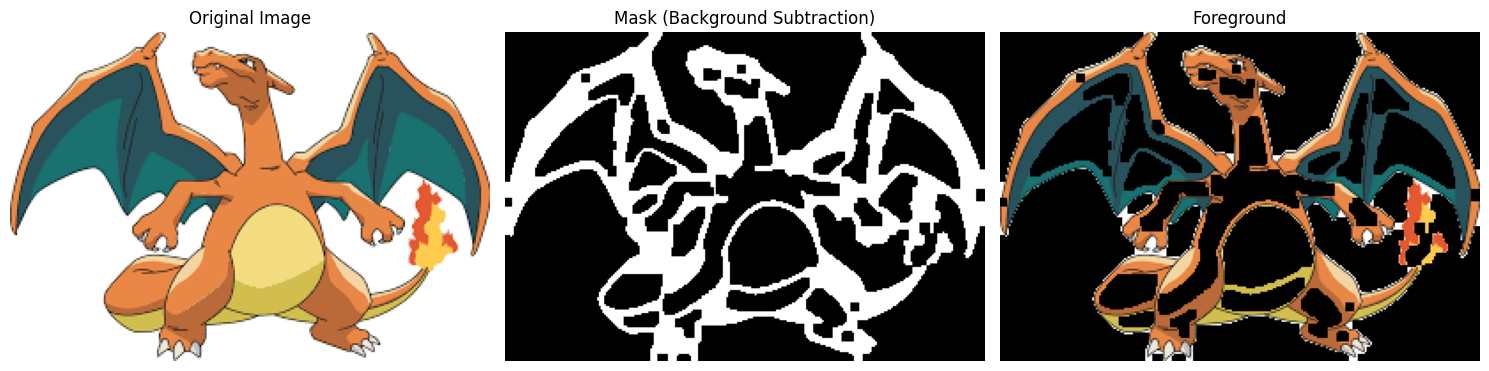

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/pokemon-img/charizad.png"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image. Check the path!")
else:
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use adaptive thresholding to create a mask
    mask = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )

    # Perform morphological operations to clean up the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Use the mask to extract the foreground
    foreground = cv2.bitwise_and(image, image, mask=cleaned_mask)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Mask (Background Subtraction)")
    plt.imshow(cleaned_mask, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Foreground")
    plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()
